# Telco EDA

### Importing packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## 1. Preliminary cleaning on first dataset
### Reading the first CSV

In [2]:
telco_df = pd.read_csv('Telco_customer_churn.csv')

In [3]:
telco_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
telco_df.shape

(7043, 33)

### Looking at the datatype of each variable 

In [5]:
telco_df.dtypes 

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

#### Changing Total Charges to numeric 

In [6]:
telco_df['Total Charges'] = pd.to_numeric(telco_df['Total Charges'], errors='coerce')

### Looking for null values 

In [7]:
telco_df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

#### Looking more closely at total charges null values 

In [8]:
telco_df[telco_df['Total Charges'].isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


### It looks like these customers might have just signed up...  will impute monthly charges as total charges for these customers

In [9]:
telco_df['Total Charges'].fillna(telco_df['Monthly Charges'], inplace=True)

### Imputing "Not churned" for Churn Reason null values

In [10]:
telco_df['Churn Reason'].fillna('Not churned', inplace=True)

### Saving the cleaned dataframe as a csv just in case!

In [ ]:
telco_df.to_csv('Telco_customer_churn_cleaned.csv', index = False)

## 2. Preliminary cleaning on second dataset
### Reading the second CSV

In [11]:
telco_df2 = pd.read_csv('Telco_customer_churn_status.csv')

In [12]:
telco_df2.head()

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


### Looking at the datatype of each variable

In [13]:
telco_df2.dtypes 

Customer ID           object
Count                  int64
Quarter               object
Satisfaction Score     int64
Customer Status       object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Category        object
Churn Reason          object
dtype: object

### Looking at null values 

In [14]:
telco_df2.isnull().sum()

Customer ID              0
Count                    0
Quarter                  0
Satisfaction Score       0
Customer Status          0
Churn Label              0
Churn Value              0
Churn Score              0
CLTV                     0
Churn Category        5174
Churn Reason          5174
dtype: int64

### Imputing "Not churned" for Churn Category and Churn Reason null values 

In [15]:
telco_df2['Churn Category'].fillna('Not churned', inplace=True)
telco_df2['Churn Reason'].fillna('Not churned', inplace=True)

## 3. Creating merged dataframe from telco_df and telco_df2
### First renaming telco_df "CustomerID" column to "Customer ID"

In [16]:
telco_df.rename(columns = {'CustomerID' : 'Customer ID'}, inplace = True)

### And dropping common columns 

In [17]:
telco_df2.drop(['Count', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1, inplace=True)

### Making merged dataframe 

In [18]:
telco_df_merged = pd.merge(telco_df, telco_df2, on='Customer ID', how='inner')

### Looking at unique values for each column to decide what columns to use label encoder on and what columns to use hot label encoder on... 

In [19]:
telco_df_merged.nunique()

Customer ID           7043
Count                    1
Country                  1
State                    1
City                  1129
Zip Code              1652
Lat Long              1652
Latitude              1652
Longitude             1651
Gender                   2
Senior Citizen           2
Partner                  2
Dependents               2
Tenure Months           73
Phone Service            2
Multiple Lines           3
Internet Service         3
Online Security          3
Online Backup            3
Device Protection        3
Tech Support             3
Streaming TV             3
Streaming Movies         3
Contract                 3
Paperless Billing        2
Payment Method           4
Monthly Charges       1585
Total Charges         6534
Churn Label              2
Churn Value              2
Churn Score             85
CLTV                  3438
Churn Reason            21
Quarter                  1
Satisfaction Score       5
Customer Status          3
Churn Category           6
d

### Looking at unique values for categorical variables 

In [20]:
telco_df_merged_cat = telco_df_merged.select_dtypes(exclude=['int', 'float'])
for col in telco_df_merged_cat.columns:
    print(col)
    print(telco_df_merged_cat[col].value_counts()) # to print count of every category
    print('')

Customer ID
7668-XCFYV    1
7153-OANIO    1
1574-DYCWE    1
2039-JONDJ    1
3569-JFODW    1
             ..
1981-INRFU    1
8601-QACRS    1
2038-OEQZH    1
5847-MXBEO    1
0799-DDIHE    1
Name: Customer ID, Length: 7043, dtype: int64

Country
United States    7043
Name: Country, dtype: int64

State
California    7043
Name: State, dtype: int64

City
Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Gonzales           4
Fowler             4
Exeter             4
Huron              4
Dos Rios           4
Name: City, Length: 1129, dtype: int64

Lat Long
33.88151, -118.234451     5
34.281911, -118.556218    5
32.800671, -116.483363    5
34.026334, -118.474222    5
34.099869, -118.326843    5
                         ..
37.750778, -121.13238     4
38.542448, -122.419923    4
38.00474, -122.663717     4
35.369553, -120.763864    4
40.737431, -124.108897    4
Name: Lat Long, Length: 1652, dtype: int64

Gender
Male      

### Notes: 
- Customer ID can now be dropped
- Count can be dropped 
- Country, State and Quarter can be dropped as these columns only have one value 
- City, Zip Code, Lat Long, Latitude and Longitude will be dropped as they don't appear helpful from Tableau viz and will create too many features 
- Gender, Senior Citizen, Partner, Dependents, Phone Service, Paperless Billing: use Label Encoder 
- Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract, Payment Method: get dummies?  
- Churn Score, Churn Reason, Customer Status, Churn Category cannot be used for the model and will be dropped
- Churn Label will be dropped, Churn Value will be kept as the target

### Saving merged dataframe before continuing to clean data for model...

In [ ]:
telco_df_merged.to_csv('telco_merged.csv', index = False)

## 4. Cleaning for modelling 

### Dropping:
#### Customer ID, Count, Country, State, City, Zip Code, Lat Long, Latitude, Longitute, Quarter, Churn Label, Churn Reason, Customer Status, Churn Category,

In [21]:
telco_df_merged.drop(['Customer ID', 'Count', 'Country', 'State', 'City', 'Zip Code',
                      'Lat Long', 'Latitude', 'Longitude', 'Quarter', 'Churn Score',
                      'Churn Label', 'Churn Reason', 'Customer Status', 'Churn Category'], axis=1, inplace=True)

In [22]:
telco_df_merged.nunique()

Gender                   2
Senior Citizen           2
Partner                  2
Dependents               2
Tenure Months           73
Phone Service            2
Multiple Lines           3
Internet Service         3
Online Security          3
Online Backup            3
Device Protection        3
Tech Support             3
Streaming TV             3
Streaming Movies         3
Contract                 3
Paperless Billing        2
Payment Method           4
Monthly Charges       1585
Total Charges         6534
Churn Value              2
CLTV                  3438
Satisfaction Score       5
dtype: int64

In [23]:
telco_df_merged.dtypes

Gender                 object
Senior Citizen         object
Partner                object
Dependents             object
Tenure Months           int64
Phone Service          object
Multiple Lines         object
Internet Service       object
Online Security        object
Online Backup          object
Device Protection      object
Tech Support           object
Streaming TV           object
Streaming Movies       object
Contract               object
Paperless Billing      object
Payment Method         object
Monthly Charges       float64
Total Charges         float64
Churn Value             int64
CLTV                    int64
Satisfaction Score      int64
dtype: object

### Using LabelEncoder on:
#### Gender, Senior Citizen, Partner, Dependents, Phone Service, Paperless Billing

In [24]:
binary_list = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']

for col in binary_list:
    telco_df_merged[col] = LabelEncoder().fit_transform(telco_df_merged[col])

### Using pd.get_dummies on: 
#### Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract, Payment Method

In [25]:
cat_list = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 
            'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
            'Contract', 'Payment Method']

telco_df_merged = pd.get_dummies(data=telco_df_merged, prefix=cat_list, columns=cat_list)

### Inspecting new dataframe 

In [26]:
telco_df_merged.iloc[0:10, 10:20]

,CLTV,Satisfaction Score,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service
0,3239,1,1,0,0,1,0,0,0,0
1,2701,2,1,0,0,0,1,0,1,0
2,5372,3,0,0,1,0,1,0,1,0
3,5003,3,0,0,1,0,1,0,1,0
4,5340,1,0,0,1,0,1,0,1,0
5,5925,1,1,0,0,1,0,0,1,0
6,5433,3,0,1,0,1,0,0,1,0
7,4832,1,1,0,0,0,0,1,0,1
8,5789,1,0,0,1,0,1,0,1,0
9,2915,1,0,1,0,1,0,0,1,0


In [27]:
telco_df_merged.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'Churn Value', 'CLTV', 'Satisfaction Score',
       'Multiple Lines_No', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Cont

In [28]:
telco_df_merged.dtypes

Gender                                        int64
Senior Citizen                                int64
Partner                                       int64
Dependents                                    int64
Tenure Months                                 int64
Phone Service                                 int64
Paperless Billing                             int64
Monthly Charges                             float64
Total Charges                               float64
Churn Value                                   int64
CLTV                                          int64
Satisfaction Score                            int64
Multiple Lines_No                             uint8
Multiple Lines_No phone service               uint8
Multiple Lines_Yes                            uint8
Internet Service_DSL                          uint8
Internet Service_Fiber optic                  uint8
Internet Service_No                           uint8
Online Security_No                            uint8
Online Secur

## 5. Exploring correlations, etc. 

### Looking at the correlation of "Churn" with other variables:

<AxesSubplot:>

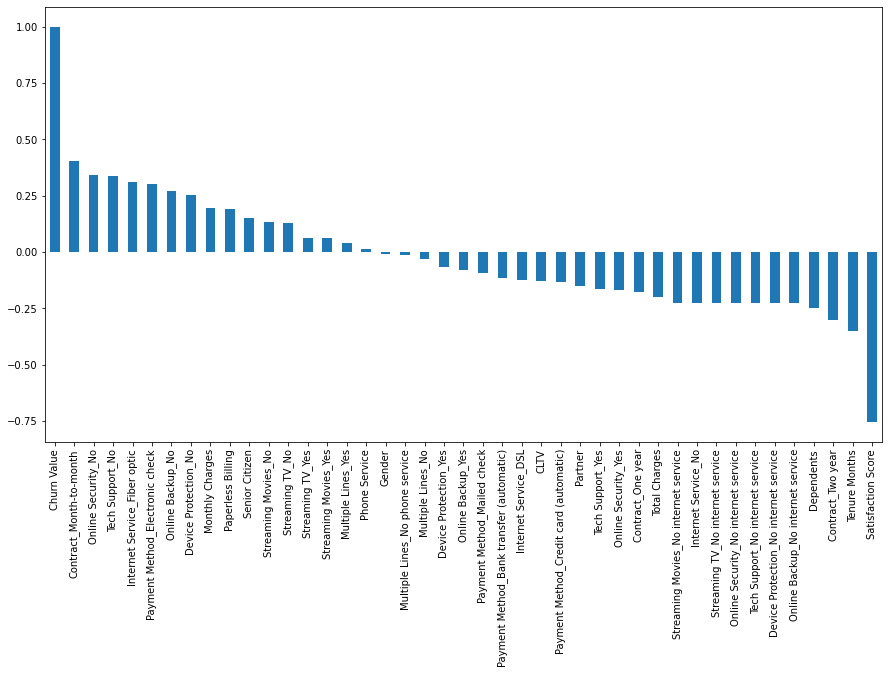

In [30]:
plt.figure(figsize=(15,8))
telco_df_merged.corr()['Churn Value'].sort_values(ascending = False).plot(kind='bar')

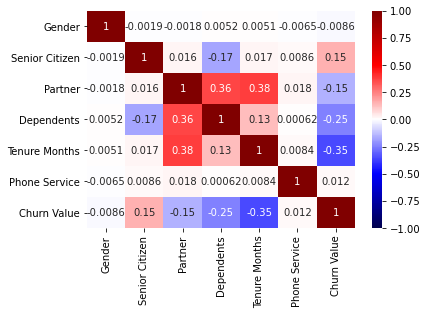

In [31]:
smaller_df = telco_df_merged[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months','Phone Service','Churn Value']]

sns.heatmap(smaller_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

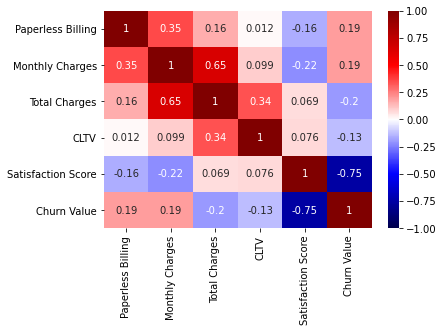

In [38]:
smaller_df2 = telco_df_merged[['Paperless Billing','Monthly Charges','Total Charges', 'CLTV', 'Satisfaction Score','Churn Value']]

sns.heatmap(smaller_df2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

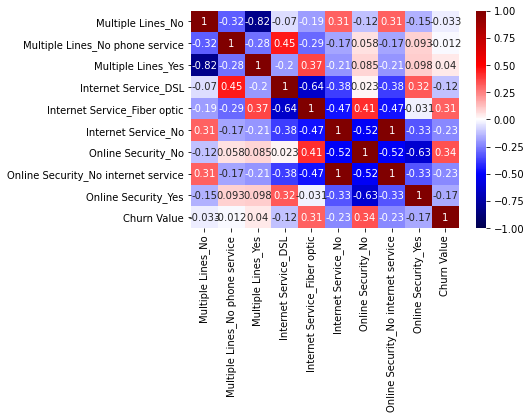

In [39]:
smaller_df3 = telco_df_merged[['Multiple Lines_No', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Churn Value']]

sns.heatmap(smaller_df3.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

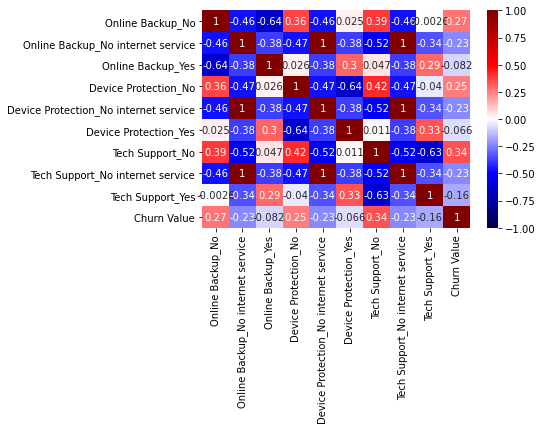

In [40]:
smaller_df4 = telco_df_merged[['Online Backup_No',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No',
       'Tech Support_No internet service', 'Tech Support_Yes', 'Churn Value']]

sns.heatmap(smaller_df4.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

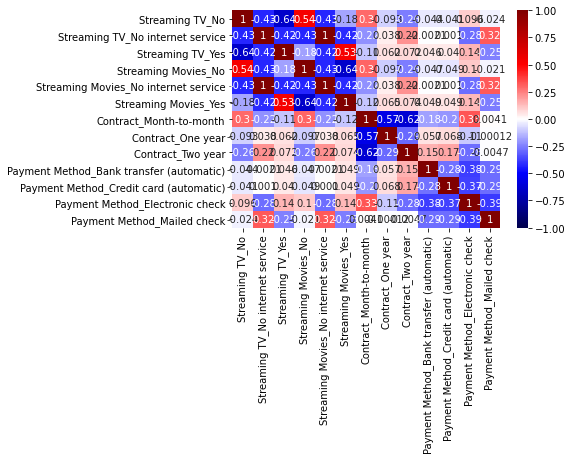

In [37]:
smaller_df5 = telco_df_merged[['Streaming TV_No', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check']]

sns.heatmap(smaller_df5.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

### It is clear that "Streaming TV_ No internet service" and "Streaming Movies_No internet service" etc. are the same and multicollinear, so will just keep one and drop the rest

In [42]:
telco_df_merged.drop(['Online Security_No internet service', 'Online Backup_No internet service',
                     'Device Protection_No internet service', 'Tech Support_No internet service',
                     'Streaming TV_No internet service', 'Streaming Movies_No internet service'], axis=1, inplace=True)

### Saving the modelling dataframe just in case

In [43]:
telco_df_merged.to_csv('telco_merged_modelling.csv', index = False)